# Time Series Modelling




We follow the notations of Tsay R. (2010) *Analysis of Financial Time Series*. John Wiley & Sons, Inc., Hoboken, New Jersey.

The following notebook is an adaptation of Tsay's book except the codes are written in Python


## Normal Distribution


A traditional assumption made in financial study is that the simple returns ${R_{it} | t = 1, . . . , T }$ are independently and identically distributed as normal with fixed mean and variance. This assumption makes statistical properties of asset returns tractable. But it encounters several difficulties. 

* The lower bound of a simple return is −1. Yet the normal distribution may assume any value in the real line and, hence, has no lower bound. 
* If $R_{it}$ is normally distributed, then the multiperiod simple return $R_{it}[k]$ is not normally distributed because it is a product of one-period returns. 
* The normality assumption is not supported by many empirical asset returns, which tend to have a positive excess kurtosis.





## Lognormal Distribution

Another commonly used assumption is that the log returns $r_t$ of an asset are independent and identically distributed (iid) as normal with mean $\mu$ and variance $\sigma^2$. The simple returns are then iid lognormal random variables with mean and variance given by

\begin{align}
E(R_t) & = \text{exp}(\mu+\frac{\sigma^2}{2})-1 \\ 
\text{Var}(R_t) & =\text{exp}(2\mu+\sigma^2)[\text{exp}(\sigma^2)-1] \\
\end{align}

These two equations are useful in studying asset returns (e.g., in forecasting using models built for log returns).

Alternatively, let $m_1$ and $m_2$ be the mean and variance of the simple return $R_t$ , which is lognormally distributed. Then the mean and variance of the corresponding log return $r_t$ are

\begin{align}
E(r_t) & = ln\bigg[ \frac{m_1+1}{\sqrt{1+ \frac{m_2}{(1+m_1)^2}}}\bigg] \\ 
\text{Var}(r_t) & =ln\bigg[ 1 + \frac{m_2}{(1 + m_1)^2}\bigg] \\
\end{align}

Because the sum of a finite number of iid normal random variables is normal, $r_t[k]$ is also normally distributed under the normal assumption for ${r_t}$. In addition, there is no lower bound for $r_t$ , and the lower bound for $R_t$ is satisfied using
$1 + R_t = \text{exp}(r_t)$. However, the lognormal assumption is not consistent with all the properties of historical stock returns. In particular, many stock returns exhibit a positive excess kurtosis.

***

## Stable Distribution

The stable distributions are a natural generalization of normal in that they are stable under addition, which meets the need of continuously compounded returns $r_t$. Furthermore, stable distributions are capable of capturing excess kurtosis shown
by historical stock returns. However, nonnormal stable distributions do not have a finite variance, which is in conflict with most finance theories. In addition, statistical modeling using nonnormal stable distributions is difficult. An example of
nonnormal stable distributions is the Cauchy distribution, which is symmetric with respect to its median but has infinite variance.

## Scale Mixture of Normal Distributions

Recent studies of stock returns tend to use scale mixture or finite mixture of normal distributions. Under the assumption of scale mixture of normal distributions, the log return $r_t$ is normally distributed with mean $\mu$ and variance $\sigma^2$ [i.e., $r_t ∼ N(\mu, \sigma^2)$]. However, $\sigma^2$ is a random variable that follows a positive distribution (e.g., $\sigma^{-2}$ follows a gamma distribution). An example of finite mixture of normal distributions is

$$r_t ∼ (1-X)N(\mu,\sigma_1^2)+XN(\mu,\sigma_2^2)$$

where $X$ is a Bernoulli random variable such that $P(X = 1) = \alpha$ and $P(X = 0) = 1 − \alpha$ with $0 < \alpha < 1$, $\sigma_1^2$ is small, and $\sigma_2^2$ is relatively large. For instance, with $\alpha = 0.05$, the finite mixture says that 95% of the returns follow $N(\mu, \sigma_1^2)$ and 5% follow $N(\mu, \sigma_2^2)$. The large value of $\sigma_2^2$ enables the mixture to put more mass at the tails of its distribution. The low percentage of returns that are from $N(\mu, \sigma_2^2)$ says
that the majority of the returns follow a simple normal distribution. Advantages of mixtures of normal include that they maintain the tractability of normal, have finite higher order moments, and can capture the excess kurtosis. Yet it is hard to
estimate the mixture parameters (e.g., the $\alpha$ in the finite-mixture case).





[Jake VanderPlas - Kernel Density Estimation in Python](https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/)

[Jake VanderPlas - Kernel Density Estimation in Python Notebook](http://nbviewer.jupyter.org/url/jakevdp.github.com/downloads/notebooks/KDEBench.ipynb)

[Michael Lerner - Histograms and kernel density estimation KDE 2](https://mglerner.github.io/posts/histograms-and-kernel-density-estimation-kde-2.html?p=28)

In [1]:
import math
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
sns.set()
from pandas_datareader import data, wb
import datetime
from scipy import stats

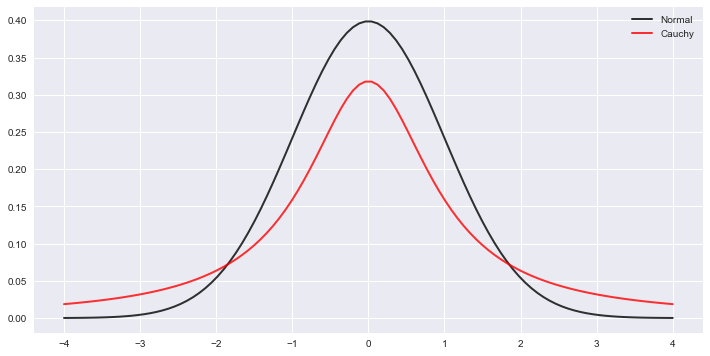

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
x = np.linspace(-4, 4, 100)
line1, = ax.plot(x, stats.norm.pdf(x), 'k-', lw=2, alpha=0.8, label='normal pdf')
line2, = ax.plot(x, stats.cauchy.pdf(x), 'r-', lw=2, alpha=0.8, label='cauchy pdf')
plt.legend([line1, line2], ["Normal", "Cauchy"]);

In [3]:
def std_norm_pdf(x):
    return 1 / np.sqrt(2 * math.pi) * np.exp(-x ** 2 / 2)

In [4]:
def norm_pdf(mu, sigma, x):
    return 1 / (sigma * np.sqrt(2 * math.pi)) * np.exp(- 1 / 2 * ((x - mu) / sigma) ** 2)

In [5]:
mu = [0, 0]
sigma = [1, 4]
alpha = 0.05
length = 100000

x = np.linspace(-4, 4, length)

samples_1 = np.random.normal(mu[0], sigma[0], length)
samples_2 = np.random.normal(mu[1], sigma[1], length)
ind = np.random.rand(length)
res = []
for k, v in enumerate(ind):
    if v >= alpha:
        res.append(samples_1[k])
    else:
        res.append(samples_2[k])
mm_mean = np.mean(res)
mm_std = np.std(res)

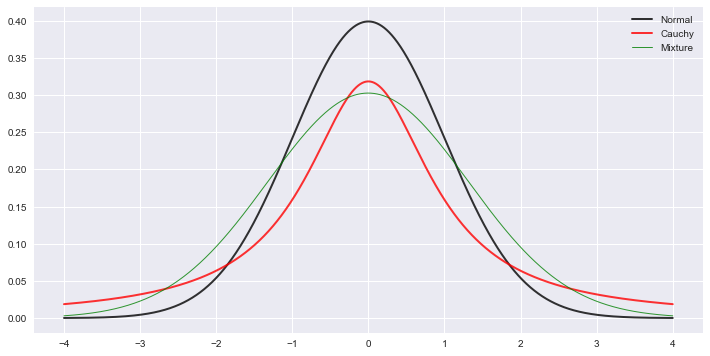

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
x = np.linspace(-4, 4, length)
y = norm_pdf(mm_mean, mm_std, x)

line1, = ax.plot(x, stats.norm.pdf(x), 'k-', lw=2, alpha=0.8, label='Nrmal')
line2, = ax.plot(x, stats.cauchy.pdf(x), 'r-', lw=2, alpha=0.8, label='Cauchy')
line3, = ax.plot(x, y, 'g-', lw=1, alpha=0.8, label='Mixture')
plt.legend([line1, line2, line3], ["Normal", "Cauchy", "Mixture"]);

# Multivariate Returns

Joint distribution 

How conditional expectation and conditional covariance matrix evolve over time

Random Vector $X = (X_1, ..., X_p)$

$E(X)=\mu_x=[E(X_1), ..., E(X_p)]^\prime$

$Cov(X)=\sum_x=E[(X - \mu_x)(X - \mu_x)^\prime]$





# Likelihood Function of Returns

Some financial theories such as the capital asset pricing model (CAPM) of Sharpe (1964) focus on the joint distribution of $N$ returns at a **single time index $t$** (i.e., the distribution of ${r_{1t}, ..., r_{Nt}}$). In this, we are looking at the returns of all the different assets, $1, ..., N$, at time $T$ only.


Other theories emphasize the **dynamic structure** of individual asset returns (i.e., the distribution of {$r_{i1}, ..., r_{iT}$} for a given asset $i$). Here are only looking at the returns of asset $i$ across time, $1, ..., T$.

In univariate analysis, our main concern is the joint distribution of {$r_{it}$}$^T_{t=1}$ for asset $i$. To this end, it is useful to partition the joint distribution as

\begin{align}
F(r_{i1}, ...r_{iT}; \theta) & = F(r_{i1}; \theta)F(r_{i2}|r_{i1}; \theta)...F(r_{iT}|r_{i, T-1}, ...,r_{i1}; \theta) \\ 
& = F(r_{i1}; \theta)\prod_{t=2}^TF(r_{it}|r_{i,t-1}, ..., r_{i1}; \theta) \\
\end{align}

This partition highlights the temporal dependencies of the log return $r_{it}$.

The above equation can be used to obtain the likelihood function of the log returns {$r_1, ..., r_T$} of an asset.

If the conditional distribution $f(r_t|r_{t-1}, ..., r_1, \theta)$ is normal with mean $\mu_t$ and variance $\sigma_t^2$, when $\theta$ consists of the parameters in $\mu_t$ and $\sigma_t^2$ and the likelihood function of the data is:


$$f(r_1, ..., r_T;\theta)=f(r_1;\theta)\prod_{t=2}^T\frac{1}{\sqrt{2\pi}\sigma_t}exp\bigg[\frac{-(r_t-\mu_t)^2}{2\sigma_t^2}\bigg]$$

where $f(r_1; θ)$ is the marginal density function of the first observation $r_1$. The value of $\theta$ that maximizes this likelihood function is the maximum-likelihood estimate (MLE) of $\theta$. Since the log function is monotone, the MLE can be obtained by maximizing the log-likelihood function,

$$ln\  f(r_1, ..., r_T;\theta)=ln\ f(r_1;\theta) - \frac{1}{2} \sum_{t=2}^T\bigg[ln(2\pi)+ln(\sigma_t^2)+\frac{(r_t-\mu_t)^2}{\sigma_t^2}\bigg]$$



# Empirical Properties of Return

In [54]:
start = datetime.datetime(1975, 1, 1)
end = datetime.datetime(2015, 1, 1)

In [56]:
f = data.DataReader("IBM", 'yahoo', start, end)

In [67]:
df = f.resample('M').asfreq().ffill()

In [68]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1974-12-31,10.375000,10.554688,10.375000,10.500000,3.329909,782400.0
1975-01-31,11.453125,11.812500,11.453125,11.765625,3.731280,1542400.0
1975-02-28,13.265625,13.484375,13.242188,13.468750,4.303698,1094400.0
1975-03-31,12.968750,13.031250,12.859375,12.914063,4.126455,796800.0
1975-04-30,12.640625,13.125000,12.609375,13.117188,4.191364,1099200.0


In [69]:
df['Simple Return'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Simple Return
Date,,,,,,,
1974-12-31,10.375000,10.554688,10.375000,10.500000,3.329909,782400.0,NaN
1975-01-31,11.453125,11.812500,11.453125,11.765625,3.731280,1542400.0,0.120535
1975-02-28,13.265625,13.484375,13.242188,13.468750,4.303698,1094400.0,0.153411
1975-03-31,12.968750,13.031250,12.859375,12.914063,4.126455,796800.0,-0.041184
1975-04-30,12.640625,13.125000,12.609375,13.117188,4.191364,1099200.0,0.015730


In [70]:
df['Log Return'] = np.log(df['Simple Return'] + 1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Simple Return,Log Return
Date,,,,,,,,
1974-12-31,10.375000,10.554688,10.375000,10.500000,3.329909,782400.0,NaN,NaN
1975-01-31,11.453125,11.812500,11.453125,11.765625,3.731280,1542400.0,0.120535,0.113806
1975-02-28,13.265625,13.484375,13.242188,13.468750,4.303698,1094400.0,0.153411,0.142723
1975-03-31,12.968750,13.031250,12.859375,12.914063,4.126455,796800.0,-0.041184,-0.042056
1975-04-30,12.640625,13.125000,12.609375,13.117188,4.191364,1099200.0,0.015730,0.015608


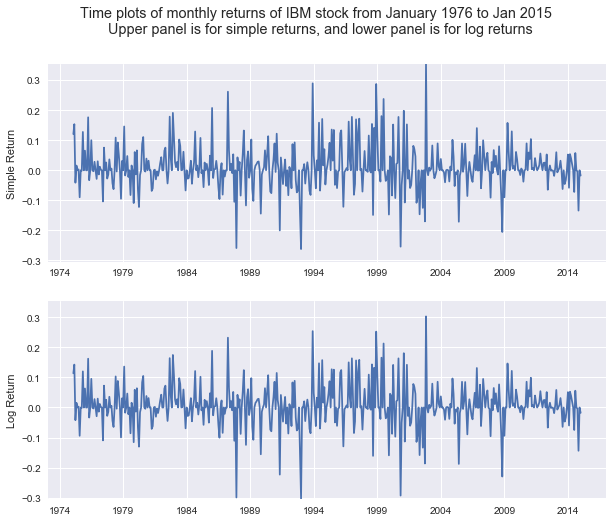

In [126]:
#fig = plt.subplots(2,1, figsize=(10,8), sharey=True)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.suptitle('Time plots of monthly returns of IBM stock from January 1976 to Jan 2015 \n \
Upper panel is for simple returns, and lower panel is for log returns')

y_min = df[['Simple Return', 'Log Return']].min().min()
y_max = df[['Simple Return', 'Log Return']].max().max()
ax1.set_ylim([y_min, y_max])
ax1.plot(df['Simple Return']); 
ax1.axes.set_ylabel('Simple Return');

ax2.set_ylim([y_min, y_max])
ax2.plot(df['Log Return'])
ax2.axes.set_ylabel('Log Return');

***